In [67]:
import pickle
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import rcParams
from matplotlib.colors import LinearSegmentedColormap
import numpy as np
import matplotlib.patches as mpatches

In [68]:
# General settings
import matplotlib as mpl
mpl.rc_file('/Users/ulyanadupletsa/Documents/PhDThesisPlots/matplotlibrc')


matplotlib.rc('xtick', labelsize = 21) 
matplotlib.rc('ytick', labelsize = 21)

In [69]:
color1 = '#121f1f'
color2 = '#eba75f'
mycmap = LinearSegmentedColormap.from_list("my_cmap", [color1, color2])

In [102]:
mycolors = ['#2f4f4f', '#f7cf4a', '#D2691E']

In [71]:
# load data
with open('data/ppc_spectral.pkl', 'rb') as f:
    ppc = pickle.load(f)

with open('data/dpe_spectral.pkl', 'rb') as f:
    dpe = pickle.load(f)

In [72]:
# code from Simone Mastrogiovanni
def plot_ppc(pcc,variable,CI,ax,**kwargs):
    '''
    Plot Posterior predictive check
    '''

    med = np.median(pcc[variable],axis=0)
    top = np.percentile(pcc[variable],50+0.5*CI,axis=0)
    bot = np.percentile(pcc[variable],50-0.5*CI,axis=0)
    
    if variable in ['mass_1','mass_2']:
        x_array = pcc['mass_array']
    elif variable in ['redshift']:
        x_array = pcc['redshift_array']

    ax.fill_between(x_array, bot,top,alpha=0.3,**kwargs)

    kk = {}
    for key in kwargs.keys():
        if key != 'label':          
            kk[key] = kwargs[key]
    ax.plot(x_array,med,ls='--',**kk)
    
    return ax

In [73]:
ev_dictionary = ['LambdaCDM_MultiPop', 'LambdaCDM_MultiPeak', 'LambdaCDM_PLPeak']
lbs = ['Multi Pop', 'Multi Peak', 'Power Law + Peak']

In [74]:
myfontsize=21

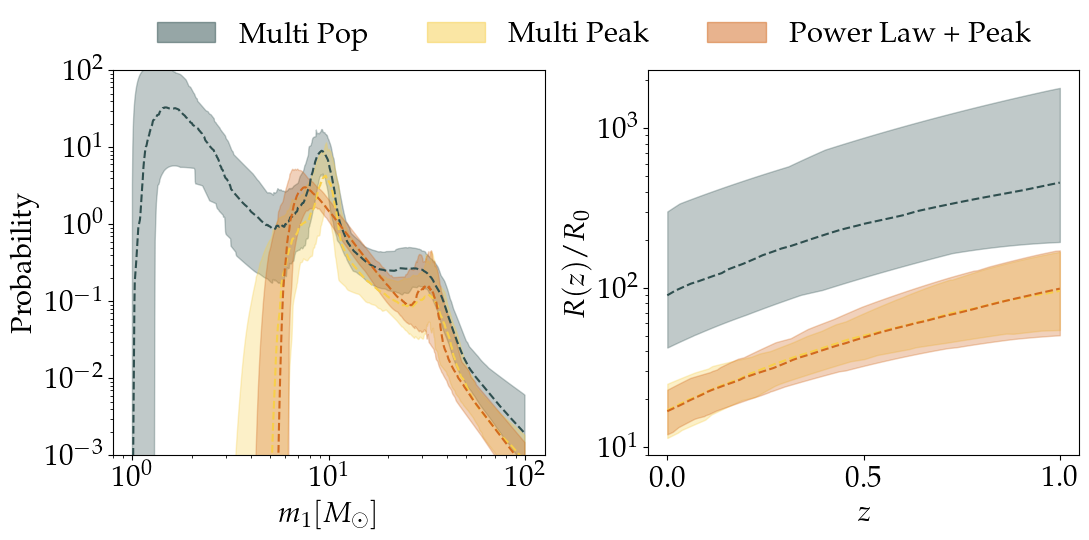

In [103]:
fig,ax = plt.subplots(1,2,figsize=(11,5))

for i, key in enumerate(ev_dictionary):

    _ = plot_ppc(ppc[key],'mass_1',90,ax[0],color=mycolors[i])
    #_ = plot_ppc(ppc[key],'mass_2',90,ax[1],color=mycolors[i],label=key)
    _ = plot_ppc(ppc[key],'redshift',90,ax[1],color=mycolors[i])

ax[0].set_yscale('log')
ax[0].set_ylim([1e-3,1e2])
ax[0].set_xscale('log')
ax[1].set_yscale('log')
#ax[1].set_xscale('log')

ax[-1].set_ylabel(r'$R(z)/R_0$', fontsize=myfontsize)

ax[0].set_xlabel(r'$m_1 [M_\odot]$', fontsize=myfontsize)
ax[1].set_xlabel(r'$z$', fontsize=myfontsize)
ax[0].set_ylabel('Probability', fontsize=myfontsize)

# Create patches for the legend
patches = [mpatches.Patch(color=mycolors[i], alpha=0.5, label=lbs[i]) for i in range(len(mycolors))]
fig.legend(handles=patches, frameon=False,fontsize=myfontsize, ncol=3, bbox_to_anchor=(0.965,1.1))
plt.tight_layout()
plt.savefig('plots/pp_plots_o4a.pdf', bbox_inches='tight')
plt.show()